In [95]:
import read_csv
import numpy as np
import matplotlib.pyplot as plt
import test,refractive

In [96]:
def Transmission(lam, r = 1, d = 1, n = 1):
    lam = lam*10**-9
    delphi = (4*np.pi/lam) * n * d
    F = ((4*r)/(1-r)**2)
    return 1/ (1+(F*(np.sin(delphi/2))**2))

def reflectance(n1,n2):
    return ((n1-n2)/(n1+n2))

In [97]:
def Gallium(x):
    x = x/1000
    return (1+2.60+1.75/(1-(0.256/x)**2)+4.1/(1-(17.86/x)**2))**.5

def Sapphire(x):
    x = x/1000
    return (1+1.4313493/(1-(0.0726631/x)**2)+0.65054713/(1-(0.1193242/x)**2)+5.3414021/(1-(18.028251/x)**2))**.5

def InN(x):
    return 2.9

In [98]:
Gallium(1200)

2.3269828158265473

In [99]:
file_path = r"InGaN.csv"  # Replace with the path to your CSV file
columns = read_csv.read_csv(file_path)
x_data =  np.array(columns[0])

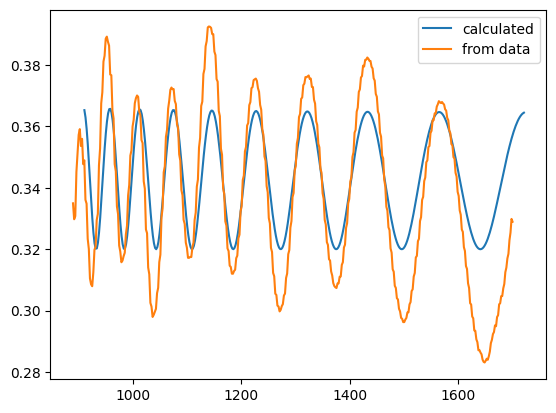

In [115]:
T1 = []
for x in x_data:
    T1.append(test.Transmission(x, r = reflectance(Gallium(x),1)*reflectance(Gallium(x),Sapphire(x)) , d = 3.5*10**(-6), n = Gallium((x))))
T1 = np.array(T1)

plt.plot(x_data+21,-0.2*np.log(T1)+0.32, label="calculated")
plt.plot(x_data, columns[1], label="from data")
plt.legend()

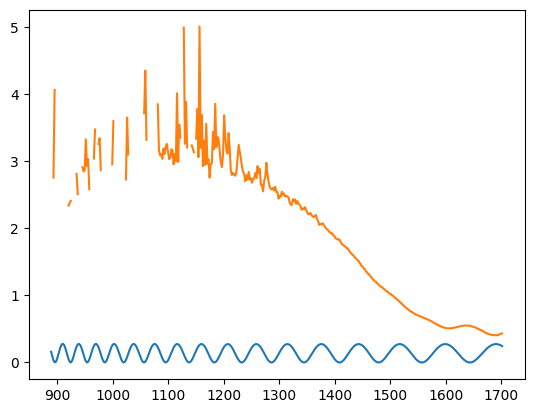

In [130]:
T2 = []
for x in x_data:
    T2.append(Transmission(x, r = reflectance(InN(x),1)*reflectance(Gallium(x),Sapphire(x)) , d = 5.1*10**(-6), n = InN((x))))

l = 0
z = 2
plt.plot(x_data[l:], -np.log(T2)[l:], label="calculated")   
plt.plot(x_data[z:][l:], columns[9][l:], label="k")